# Predicting heart disease using ML
This nb uses various Py-based ML and DS libraries in an attempt to build a Machine learning model that predicts, given enough medical data whether a person has heart disease.

Steps:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem def:
>Create a machine learning model using Python libraries to predict whether a person has heart disease.

## 2. Data: 
>The original data comes from Cleveland data from the UCI Machine learning Repo.

>A copy of this data can be found on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

## 3. Evaluation:
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project

## 4. Features:
>This is where you get info about each of the features in the data.

**Data Dictionary**


1. age- age in years

2. sex- (1 = male; 0 = female)

3. cp- chest pain type
      * 0: Typical angina: chest pain related decrease blood supply to the heart
      * 1: Atypical angina: chest pain not related to heart
      * 2: Non-anginal pain: typically esophageal spasms (non heart related)
      * 3: Asymptomatic: chest pain not showing signs of disease

4. trestbps- resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5. chol- serum cholestoral in mg/dl
      * serum = LDL + HDL + .2 * triglycerides
      * above 200 is cause for concern

6. fbs- (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
      * '>126' mg/dL signals diabetes

7. restecg- resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
      * can range from mild symptoms to severe problems
      * signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
      * Enlarged heart's main pumping chamber

8. thalach- maximum heart rate achieved

9. exang- exercise induced angina (1 = yes; 0 = no)

10. oldpeak- ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11. slope- the slope of the peak exercise ST segment
       * 0: Upsloping: better heart rate with excercise (uncommon)
       * 1: Flatsloping: minimal change (typical healthy heart)
       * 2: Downslopins: signs of unhealthy heart

12. ca- number of major vessels (0-3) colored by flourosopy
       * colored vessel means the doctor can see the blood passing through
       * the more blood movement the better (no clots)

13. thal- thalium stress result 
       * 3 = normal; 
       * 6 = fixed defect; 
       * 7 = reversable defect

14. target- have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools
Using pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:
#Import all tools we need
#Regular EDA-expolatory data analysis and plotting libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 #plots appear inside the nb.
%matplotlib inline

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model eval
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("./data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (Exploratory data analysis)
The goal here is to become a subject matter expert on the dataset

1. What questions are you trying to solve?
2. What kind of data do we have and how to we treat different types?
3. What is missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add/change/remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#finding how many of each class there are
df["target"].value_counts()
#165-1, 138-0 . so this is a fairly balanced problem

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

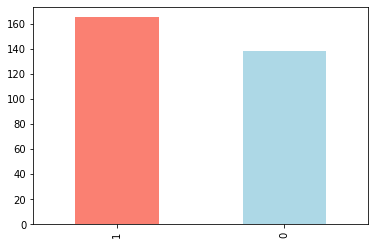

In [6]:
df["target"].value_counts().plot(kind = "bar", color= ["salmon", "lightblue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding patterns in the data

### Heart Disease Frequency according to gender 

In [10]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

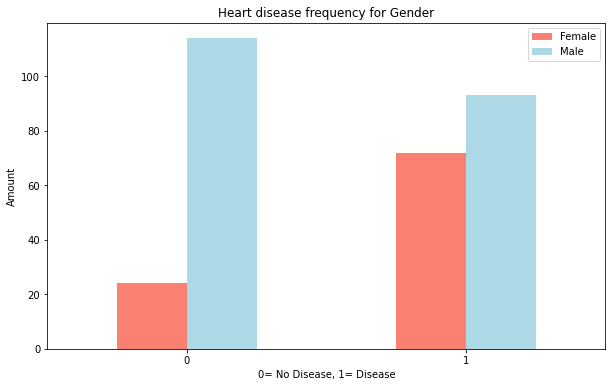

In [12]:
#Create a plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar",
                                         figsize = (10,6),
                                         color= ["salmon", "lightblue"])
plt.title("Heart disease frequency for Gender")
plt.xlabel("0= No Disease, 1= Disease" )
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation =0)

### Heart Disease frequency according to age & thalach (max-heart rate)

In [13]:
# df["thalach"].value_counts() 
#length=91. there are many too many different values. bar graph may not work

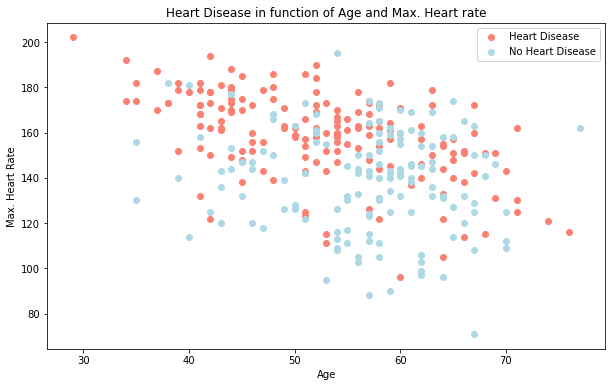

In [14]:
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df.age[df.target ==1],
           df.thalach[df.target ==1],
           c="salmon")

plt.scatter(df.age[df.target ==0],
           df.thalach[df.target==0],
           c ="lightblue")

#add some helpful info
plt.title("Heart Disease in function of Age and Max. Heart rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Heart Disease", "No Heart Disease"])

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

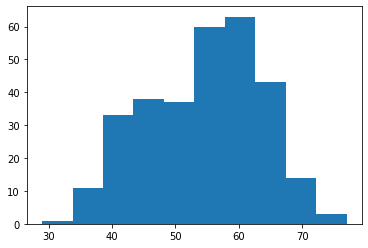

In [15]:
# Check distribution of the age column with a histogram
plt.hist(df.age)

### Heart disease freq according to Chest pain type.

In [16]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
# 0: Typical angina: chest pain related decrease blood supply to the heart
# 1: Atypical angina: chest pain not related to heart
# 2: Non-anginal pain: typically esophageal spasms (non heart related)
# 3: Asymptomatic: chest pain not showing signs of disease

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

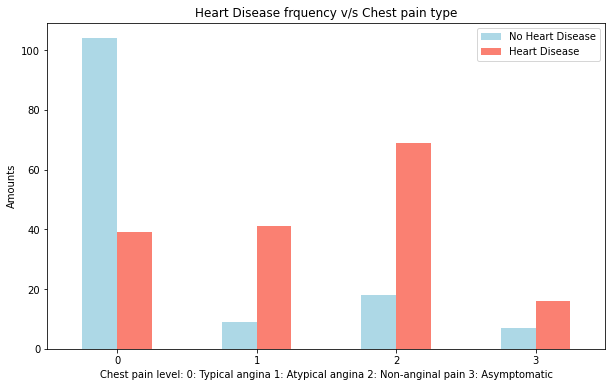

In [18]:
pd.crosstab(df.cp, df.target).plot(kind= "bar", figsize= (10,6),
                                  color=["lightblue", "salmon"])
plt.xlabel("Chest pain level: 0: Typical angina 1: Atypical angina 2: Non-anginal pain 3: Asymptomatic")
plt.ylabel("Amounts")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.title("Heart Disease frquency v/s Chest pain type")
plt.xticks(rotation=0)

## Corelation matrix
View how each of the independent variables affect the target(dependent variable)

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


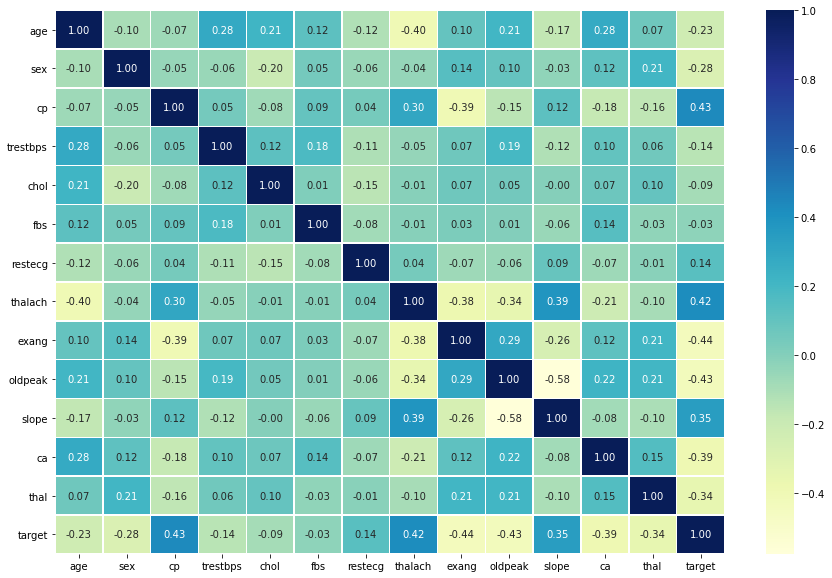

In [20]:
# making corelation matrix a litttle more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot= True,
                linewidths= 0.5,
                fmt= ".2f",
                cmap= "YlGnBu")

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

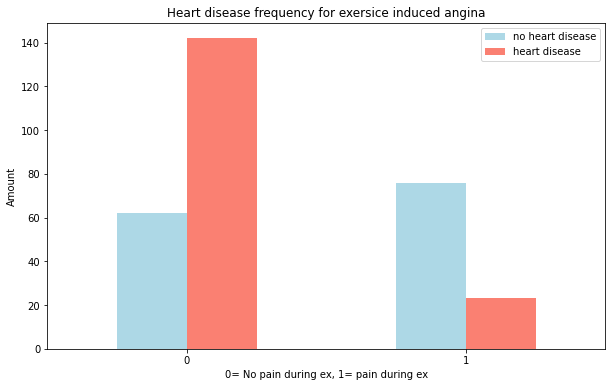

In [21]:
#Visual representation of Negative correlation between exang and target
#logically, this sounds absurd. 
pd.crosstab(df["exang"], df["target"]).plot(kind="bar",
                                         figsize = (10,6),
                                         color= ["lightblue", "salmon"])
plt.title("Heart disease frequency for exersice induced angina")
plt.xlabel("0= No pain during ex, 1= pain during ex" )
plt.ylabel("Amount")
plt.legend(["no heart disease", "heart disease"])
plt.xticks(rotation =0)


## 5. Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split data into X and y
X= df.drop("target", axis= 1)
y= df["target"]

In [24]:
# SPlit into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


We are going to try 3 ML models:
   1. Logistic Regression
   2. K-Nearest Neighbor
   3. Random Forest Classifier`


In [25]:
#  Put models in a dict
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Function to train and test the model.
def fit_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given ML models
    models: a dict of different models
    X_train, y_train: Training features & labels
    X_test, y_test: Test features & labels
    '''
    np.random.seed(42)
    #make a dict to keep model score
    model_scores = {}
    #Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_score(models= models, 
                         X_train=X_train, 
                         X_test=X_test, 
                         y_train=y_train, 
                         y_test= y_test)
model_scores

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [27]:
model_compare = pd.DataFrame(model_scores, index =["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

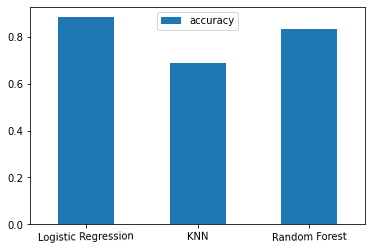

In [28]:
model_compare.T.plot(kind= "bar")
plt.xticks(rotation= 1)

we have the baseline model.
Next we see if we can improve them!
Lets look at:
* Hyperparameter tuning
* Feature parameters
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1-score
* Classification Report
* ROC curve
* Area under curve(AUC)

### hyperparameter tuning

**Hyper parameter tuning by hand**

In [29]:
# Tuning KNN By hand
train_scores= []
test_scores =[]
# Create a list of different values for n_neighbors
neighbors = range(1, 21)

#Set up KNN instance
knn = KNeighborsClassifier()

# Loop through diffrent n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #fit the model
    knn.fit(X_train, y_train)    
    #score
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [30]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score on the test data: 75.41%


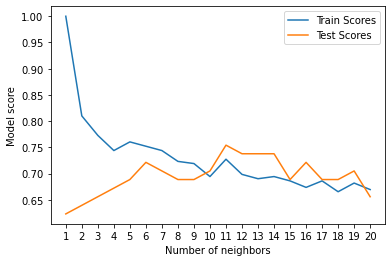

In [31]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label= "Test Scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Max KNN score on the test data: {max(test_scores)*100:.2f}%")

The highest score comes in for a n_neighbors value of 11: 75.41%, up from 68.9% at baseline

Even so, this is still much less accurate than logistic and Random forest values. so we might stop pursuing KNN.

### Hyperparameter tuning with RandomizedSearchCV
we're going to tune:
* Logistic Regression
* RandomForestClassifier
using RandomizedSearchCV


In [32]:
# create a param_grid for Logistic regression
lr_param_grid= {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

#Create param_rid for randomforestClas

rf_param_grid = {"n_estimators": np.arange(10, 1000, 50),
                "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2)}

In [33]:
# Tuning

np.random.seed(42)
#set up hyperparamsearch for Logistic reg

rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions= lr_param_grid,
                               cv= 5,
                               n_iter= 20,
                               verbose= 2)

# fit random searhc model for logistic regression

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00026366508987303583, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006951927961775605, sol

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [35]:
rs_log_reg.score(X_test, y_test) # 0.885: similar to logistic regression out of box(baseline)

0.8852459016393442

In [36]:
np.random.seed(42)
rs_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                                     param_distributions= rf_param_grid,
                                     cv= 5,
                                     n_iter= 20,
                                     verbose= 2)
#fit
rs_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.7s
[CV] END max_de

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=19, min_samples_split=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [37]:
rs_random_forest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
rs_random_forest.score(X_test, y_test) # 0.868. 3 up from 0.83 at baseline.

0.8688524590163934

In [39]:
model_scores # logistic still seems to do best- so we might continue only with logistic Regression

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Hyperparam tuning using GridSearchCV
Since LogisticReg has the best score so far. we will work with that and try to improve it.

In [40]:
# Different Hyperparam for logisticreg
lr_param_grid ={"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid= lr_param_grid,
                         cv= 5,
                         verbose= 2)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=221.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [41]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test) # 0.885 . still similar to the baseline.

0.8852459016393442

## Evaluating our tuned ML model beyond accuracy

* ROC curve & AUC
* Confusion Matrix
* Classification Report
* Precision 
* Recall
* F1

...use cross-validation where possible

In [44]:
#make prediction with tuned model

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

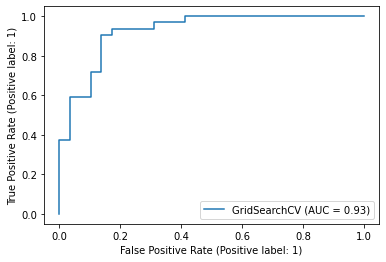

In [46]:
#plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [47]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))


[[25  4]
 [ 3 29]]


In [59]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking conf matrix using seaborn heatma
    '''
    fig, ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar= False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

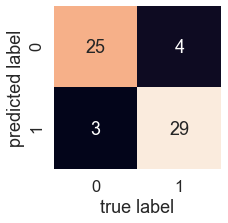

In [60]:
plot_conf_mat(y_test, y_preds)

In [ ]:
# Classification report + cross validated precision recall and f1


In [61]:
print(classification_report(y_test, y_preds)) # this is not crossvalidated becoz we use y_test

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [62]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [65]:
#create new classifier with best params
clf = LogisticRegression(C=0.20433597178569418, solver= 'liblinear')

In [66]:
accuracy_score = cross_val_score(clf, X, y, cv= 5)

In [67]:
precision_score = cross_val_score(clf, X, y, cv= 5, scoring= "precision")

In [68]:
recall_score = cross_val_score(clf, X, y, cv= 5, scoring= "recall")

In [69]:
f1_score = cross_val_score(clf, X, y, cv= 5, scoring= "f1")

In [72]:
cv_metrics = {
    "accuracy": np.mean(accuracy_score),
    "precision": np.mean(precision_score),
    "recall": np.mean(recall_score),
    "f1": np.mean(f1_score)
}
cv_metrics

{'accuracy': 0.8446994535519124,
 'precision': 0.8207936507936507,
 'recall': 0.9212121212121213,
 'f1': 0.8673007976269721}

(array([0, 1, 2, 3]),
 [Text(0, 0, 'accuracy'),
  Text(1, 0, 'precision'),
  Text(2, 0, 'recall'),
  Text(3, 0, 'f1')])

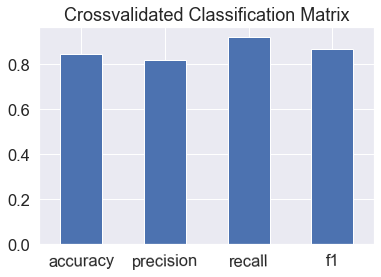

In [74]:
cv_metrics_df = pd.DataFrame(cv_metrics, index= [0])

cv_metrics_df.T.plot.bar(title= "Crossvalidated Classification Matrix", legend= False)
plt.xticks(rotation= True)

### Feature Importance
This is another way of asking, which features contributed most to the outcome of the model. and how?

Finding feature importance is different for each model.

LEts find feature importance for LogisticRegression model.

SEARCH: (model name) feature importance

In [75]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
gs_log_reg.best_params_
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [78]:
clf.coef_ #shows how each column in X_train contributes to the label

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [81]:
#match coef of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

<AxesSubplot:title={'center':'Feature importance'}>

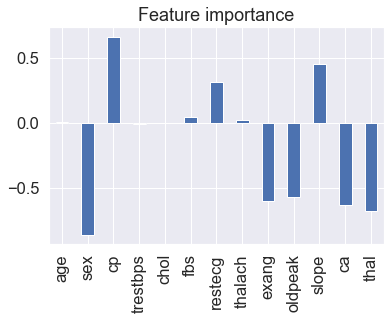

In [82]:
#visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title= "Feature importance", legend = False)

**If you havent hit your evaluation metric, ask yourself:**
* could you get more data?
* could you try a better model? like CatBoost, or XGBoost
* Could you imporve the current model?

**If your model is good enough:**
how would you export it and share with others.